<a href="https://colab.research.google.com/github/singhsukhendra/2015/blob/master/20_Feb_updated_Comparison_of_Attention_Network_with_Resnet50_for_lr_and_bs_19_Feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from tensorflow.keras import activations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
# ensure consistency across runs
from numpy.random import seed
seed(1)

# Imports to view data
import cv2
from glob import glob

#for alternative imports you can use 
#from keras.preprocessing.image import ImageDataGenerator
#from keras.models import Sequential
#from keras.layers import Conv2D, SeparableConv2D, Dense, Dropout, Flatten, LSTM,MaxPool2D, BatchNormalization
#from keras import backend
#from keras import Input
#from keras.models import Model
#from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping


from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, SeparableConv2D, Dense, Dropout, Flatten, LSTM,MaxPool2D, BatchNormalization
from tensorflow.keras import backend
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping


import numpy as np
import pandas as pd 
import os
# print(os.listdir("../input"))
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D,
                          BatchNormalization, Input, Conv2D, GlobalAveragePooling2D,concatenate,Concatenate,multiply, LocallyConnected2D, Lambda)
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
# import efficientnet.tfkeras as efn 
import skimage.io
from skimage.transform import resize
import imgaug as aug
from imgaug import augmenters as iaa
from tqdm import tqdm
import PIL
from PIL import Image, ImageOps
import cv2
from sklearn.utils import class_weight, shuffle
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
#from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.densenet import DenseNet121,DenseNet169,preprocess_input
import tensorflow.keras.backend as K
from sklearn.metrics import f1_score, fbeta_score, cohen_kappa_score
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import imgaug as ia
import tensorflow.keras.callbacks as callbacks
from tensorflow.keras.callbacks import Callback
get_ipython().run_line_magic('config', 'InlineBackend.figure_format="svg"')
get_ipython().run_line_magic('matplotlib', 'inline')

WORKERS = 2
CHANNEL = 3

import warnings
warnings.filterwarnings("ignore")

In [4]:
print(tf.config.list_physical_devices())
print(tf.__version__)
print(tf.keras.__version__)

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.8.0
2.8.0
The scikit-learn version is 1.0.2.
Python version
3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
Version info.
sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0)


In [5]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, SeparableConv2D, Dense, Dropout, Flatten, LSTM,MaxPool2D, BatchNormalization
from tensorflow.keras import backend
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping


In [6]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = []
    for dataset in ['train', 'test', 'val']:
        dataset_dir = os.path.join(data_dir, dataset)
        for label in labels: 
            path = os.path.join(dataset_dir, label)
            class_num = labels.index(label)
            print(f'Currently reading: {path}')
            for img in os.listdir(path):
                if (img == '.DS_Store'):
                    continue
                try:
                    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                    data.append([resized_arr, class_num])
                except Exception as e:
                    print(f'Error with {img}: {e}')
    return np.array(data, dtype=object)

In [7]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

In [8]:
import os
initial_count = 0
dir = "/content/drive/MyDrive/data/PNEUMONIA"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)

4273


In [9]:
import os
initial_count = 0
dir = "/content/drive/MyDrive/data/NORMAL"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)

1583


In [10]:
# If you've already ran the previous code block, run this one instead.
data = np.load('drive/MyDrive/data/data.npy', allow_pickle=True)

In [11]:
# Shuffle dataset
np.random.seed(1337)
np.random.shuffle(data)

In [12]:
train, val, test = np.split(data, [int(.75*len(data)), int(.80*len(data))])
train.shape, val.shape, test.shape

((4392, 2), (292, 2), (1172, 2))

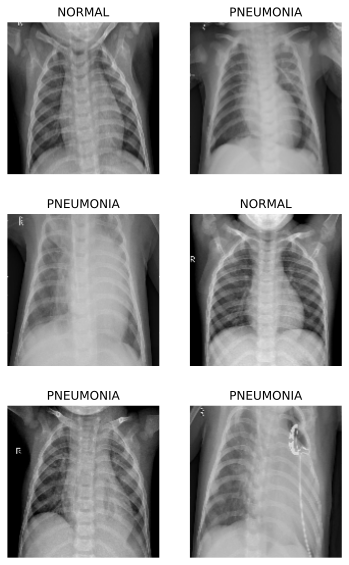

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(6,10), facecolor='white')
for idx, item in enumerate(np.random.randint(0, train.shape[0], 6)):
    ax[int(idx/2)][idx%2].imshow(train[item][0], cmap='gray')
    ax[int(idx/2)][idx%2].set_title(labels[train[item][1]])
    ax[int(idx/2)][idx%2].axis('off')

plt.savefig('data_pics.png')

Text(0.5, 1.0, 'PNEUMONIA')

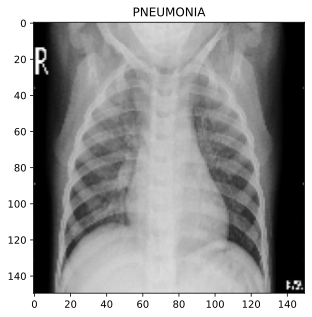

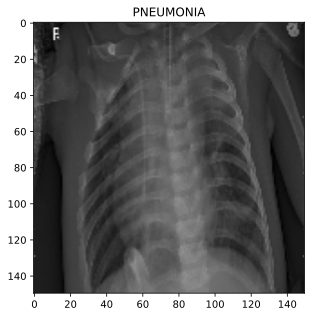

In [14]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [15]:
tr0 = np.count_nonzero(train[:, 1] == 0)
tr1 = np.count_nonzero(train[:, 1] == 1)
te0 = np.count_nonzero(test[:, 1] == 0)
te1 = np.count_nonzero(test[:, 1] == 1)
va0 = np.count_nonzero(val[:, 1] == 0)
va1 = np.count_nonzero(val[:, 1] == 1)
print(tr0, tr1)
print(te0, te1)
print(va0, va1)

3205 1187
842 330
226 66


In [16]:
print(tr0 + te0 + va0)
print(tr1 + te1 + va1)
print(tr0 + te0 + va0 + tr1 + te1 + va1)

4273
1583
5856


In [17]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [18]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [19]:
print(x_train[0].shape, x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(150, 150, 1) (4392, 150, 150, 1) (4392,) (292, 150, 150, 1) (292,) (1172, 150, 150, 1) (1172,)


In [20]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [21]:
class ChannelAttention(tf.keras.layers.Layer):
      def __init__(self, filters, ratio):
        super(ChannelAttention, self).__init__()
        self.filters = filters
        self.ratio = ratio

        def build(self, input_shape):
            self.shared_layer_one = tf.keras.layers.Dense(self.filters//self.ratio,
                             activation='relu', kernel_initializer='he_normal', 
                              use_bias=True, 
                              bias_initializer='zeros')
            self.shared_layer_two = tf.keras.layers.Dense(self.filters,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

        def call(self, inputs):
            # AvgPool
            avg_pool = tf.keras.layers.GlobalAveragePooling2D()(inputs)
            

            avg_pool = self.shared_layer_one(avg_pool)
            avg_pool = self.shared_layer_two(avg_pool)

            # MaxPool
            max_pool = tf.keras.layers.GlobalMaxPooling2D()(inputs)
            max_pool = tf.keras.layers.Reshape((1,1,filters))(max_pool)

            max_pool = self.shared_layer_one(max_pool)
            max_pool = self.shared_layer_two(max_pool)


            attention = tf.keras.layers.Add()([avg_pool,max_pool])
            attention = tf.keras.layers.Activation('sigmoid')(attention)
            
            return tf.keras.layers.Multiply()([inputs, attention])

In [22]:
class SpatialAttention(tf.keras.layers.Layer):
      def __init__(self, kernel_size):
        super(SpatialAttention, self).__init__()
        self.kernel_size = kernel_size
        
        def build(self, input_shape):
            self.conv2d = tf.keras.layers.Conv2D(filters = 1,
                    kernel_size=self.kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)

        def call(self, inputs):
            
            # AvgPool
            avg_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x, axis=3, keepdims=True))(inputs)
            
            # MaxPool
            max_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.max(x, axis=3, keepdims=True))(inputs)

            attention = tf.keras.layers.Concatenate(axis=3)([avg_pool, max_pool])

            attention = self.conv2d(attention)


            return tf.keras.layers.multiply([inputs, attention])

In [23]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [24]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X


def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [25]:
def create_model(input_shape=(150, 150, 1)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = ChannelAttention(64, 8)(X)
    X = SpatialAttention(3)(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = ChannelAttention(64, 8)(X)
    X = SpatialAttention(3)(X)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = ChannelAttention(128, 8)(X)
    X = SpatialAttention(3)(X)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = ChannelAttention(256, 8)(X)
    X = SpatialAttention(3)(X)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = ChannelAttention(512, 8)(X)
    X = SpatialAttention(3)(X)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [26]:
base_model = create_model(input_shape=(150, 150, 1))
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 1,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
n_epoch = 50

batch_size = 16

In [ ]:
lrs = ['0.01', '0.001', '0.0001']
for slr in lrs:
    lr = float(slr)
    optim = tf.keras.optimizers.Adam(learning_rate=lr)
    #model = create_model()
    model.compile(optimizer = optim, loss = 'binary_crossentropy' , metrics = ['accuracy'])
    
    learning_rate_reduction = ReduceLROnPlateau(
        monitor='val_accuracy', patience=2, verbose=1, factor=0.8
    )
    
    history = model.fit(datagen.flow(x_train,y_train, batch_size = 16), epochs=n_epoch , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])
    
    print("-"*100)
    print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
    print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")
    print("-"*100)
    print("\n"*5)
    
    np.save(f'lrs_{slr}.npy',history.history)

Epoch 1/50
275/275 [==============================] - 43s 123ms/step - loss: 2.9118 - accuracy: 0.7425 - val_loss: 0.4274 - val_accuracy: 0.7808 - lr: 0.0100
Epoch 2/50
275/275 [==============================] - 31s 114ms/step - loss: 0.3801 - accuracy: 0.8233 - val_loss: 0.3599 - val_accuracy: 0.8801 - lr: 0.0100
Epoch 3/50
275/275 [==============================] - 31s 113ms/step - loss: 0.3561 - accuracy: 0.8422 - val_loss: 0.3353 - val_accuracy: 0.8219 - lr: 0.0100
Epoch 4/50
275/275 [==============================] - ETA: 0s - loss: 0.3231 - accuracy: 0.8588
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.007999999821186066.
275/275 [==============================] - 31s 113ms/step - loss: 0.3231 - accuracy: 0.8588 - val_loss: 0.4018 - val_accuracy: 0.8596 - lr: 0.0100
Epoch 5/50
275/275 [==============================] - 32s 115ms/step - loss: 0.3096 - accuracy: 0.8648 - val_loss: 0.9450 - val_accuracy: 0.7740 - lr: 0.0080
Epoch 6/50
275/275 [==============================

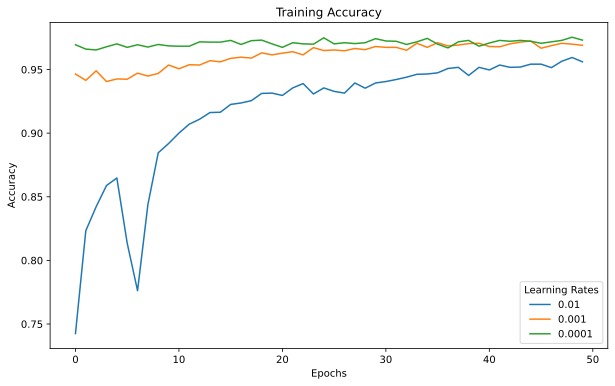

In [50]:
lrs = ['0.01', '0.001', '0.0001']
epochs = [i for i in range(n_epoch)]
fig , ax = plt.subplots(facecolor='white')
fig.set_size_inches(10, 6)

ax.set_title('Training Accuracy')
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

colors = ['C0', 'C1', 'C2']

for idx, lr in enumerate(lrs):
    hist = np.load(f'lrs_{lr}.npy', allow_pickle='true').item()
    ax.plot(epochs, hist['accuracy'], color=colors[idx], label = lr)

ax.legend(title="Learning Rates")

plt.savefig('lracc', bbox_inches='tight')

plt.show()

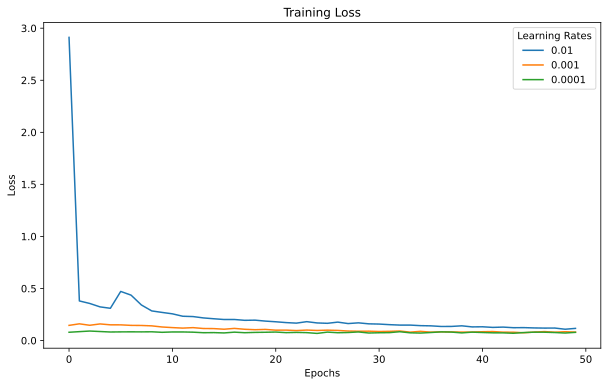

In [51]:
lrs = ['0.01', '0.001', '0.0001']
epochs = [i for i in range(n_epoch)]
fig , ax = plt.subplots(facecolor='white')
fig.set_size_inches(10, 6)

ax.set_title('Training Loss')
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

colors = ['C0', 'C1', 'C2']

for idx, lr in enumerate(lrs):
    hist = np.load(f'lrs_{lr}.npy', allow_pickle='true').item()
    ax.plot(epochs, hist['loss'], color=colors[idx], label = lr)

ax.legend(title="Learning Rates")

plt.savefig('lrloss', bbox_inches='tight')

plt.show()

0.01: 0.9560564756393433
0.001: 0.9690346121788025
0.0001: 0.9731329679489136


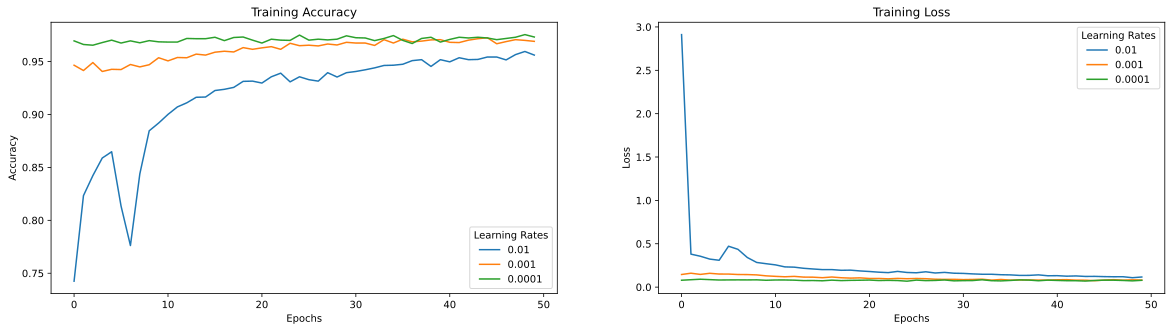

In [52]:
lrs = ['0.01', '0.001', '0.0001']
epochs = [i for i in range(n_epoch)]
fig , ax = plt.subplots(1,2, facecolor='white')
fig.set_size_inches(20,5)

ax[0].set_title('Training Accuracy')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].set_title('Training Loss')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

max_acc = -1
best_lr = -1

for idx, lr in enumerate(lrs):
    hist = np.load(f'lrs_{lr}.npy', allow_pickle='true').item()
    ax[0].plot(epochs , hist['accuracy'] , label = lr)
    ax[1].plot(epochs , hist['loss'] , label = lr)
    
    last_val = hist['accuracy'][-1]
    print(f'{lr}: {last_val}')
    if last_val > max_acc:
        max_acc = last_val
        best_lr = lr

ax[0].legend(title="Learning Rates")
ax[1].legend(title="Learning Rates")

# plt.savefig('learning rates')

plt.show()

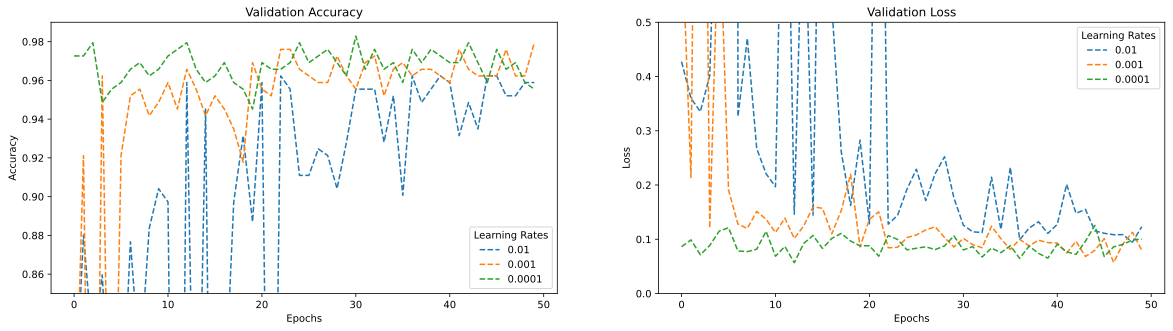

In [65]:
epochs = [i for i in range(n_epoch)]
fig , ax = plt.subplots(1,2, facecolor='white')
fig.set_size_inches(20,5)

ax[0].set_title('Validation Accuracy')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].set_title('Validation Loss')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

for idx, lr in enumerate(lrs):
    hist = np.load(f'lrs_{lr}.npy', allow_pickle='true').item()
    ax[0].plot(epochs , hist['val_accuracy'] , f'C{idx}--', label = lr)
    ax[1].plot(epochs , hist['val_loss'] , f'C{idx}--', label = lr)

ax[0].legend(title="Learning Rates")
ax[1].legend(title="Learning Rates")

ax[0].set_ylim(0.85, 0.99)
ax[1].set_ylim(0, 0.5)
plt.savefig('valacc.png')
plt.show()


In [54]:
print(f'The learning rate with the highest final accuracy is {best_lr}.')

The learning rate with the highest final accuracy is 0.0001.


In [55]:
best_lr = 0.0001

In [56]:
model = Model(inputs=base_model.input, outputs=headModel)

In [57]:
n_epoch=50

In [58]:
batch_sizes = [8, 16, 32, 64]
for batch_size in batch_sizes:
    optim = tf.keras.optimizers.Adam(learning_rate=float(best_lr))
    print(f'Using lr of {best_lr}, batch size of {batch_size}')
    #model = create_model()
    model.compile(optimizer = optim, loss = 'binary_crossentropy' , metrics = ['accuracy'])
    
    learning_rate_reduction = ReduceLROnPlateau(
        monitor='val_accuracy', patience=2, verbose=1, factor=0.8
    )
    
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=n_epoch , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])
    
    print("-"*100)
    print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
    print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")
    print("-"*100)
    print("\n"*5)
    
    np.save(f'batchsz_{batch_size}.npy',history.history)

Using lr of 0.0001, batch size of 8
Epoch 1/50
549/549 [==============================] - 46s 74ms/step - loss: 0.1079 - accuracy: 0.9640 - val_loss: 0.1370 - val_accuracy: 0.9555 - lr: 1.0000e-04
Epoch 2/50
453/549 [=======================>......] - ETA: 6s - loss: 0.1202 - accuracy: 0.9572

KeyboardInterrupt: ignored

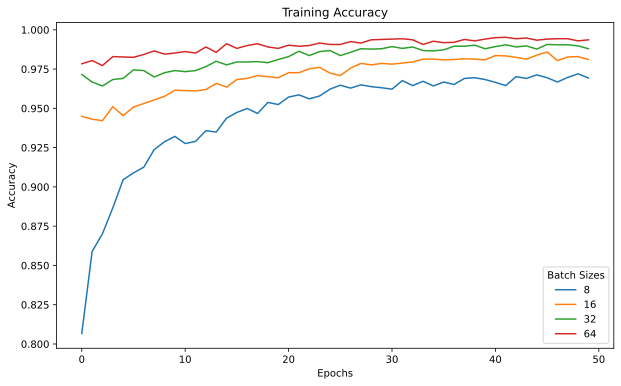

In [59]:
batch_sizes = [8, 16, 32, 64]
n_epoch=50
epochs = [i for i in range(n_epoch)]
fig , ax = plt.subplots(facecolor='white')
fig.set_size_inches(10, 6)





        
         
          

ax.set_title('Training Accuracy')
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

for idx, batch_size in enumerate(batch_sizes):
    hist = np.load(f'batchsz_{batch_size}.npy', allow_pickle='true').item()
    ax.plot(epochs, hist['accuracy'], label = batch_size)
    








    
ax.legend(title="Batch Sizes")

plt.savefig('bsacc', bbox_inches='tight')

plt.show()

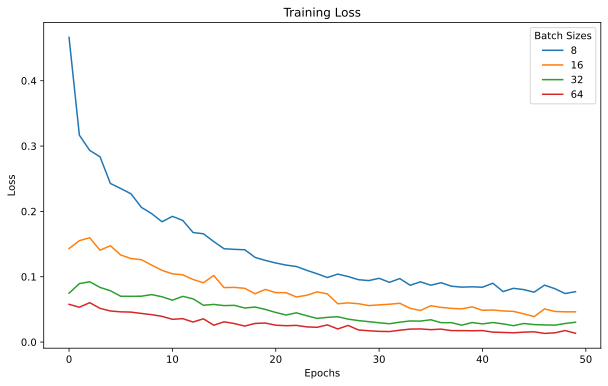

In [60]:
batch_sizes = [8, 16, 32, 64]
epochs = [i for i in range(n_epoch)]
fig , ax = plt.subplots(facecolor='white')
fig.set_size_inches(10, 6)

ax.set_title('Training Loss')
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

for idx, batch_size in enumerate(batch_sizes):
    hist = np.load(f'batchsz_{batch_size}.npy', allow_pickle='true').item()
    ax.plot(epochs, hist['loss'], label = batch_size)

ax.legend(title="Batch Sizes")

plt.savefig('bsloss', bbox_inches='tight')

plt.show()

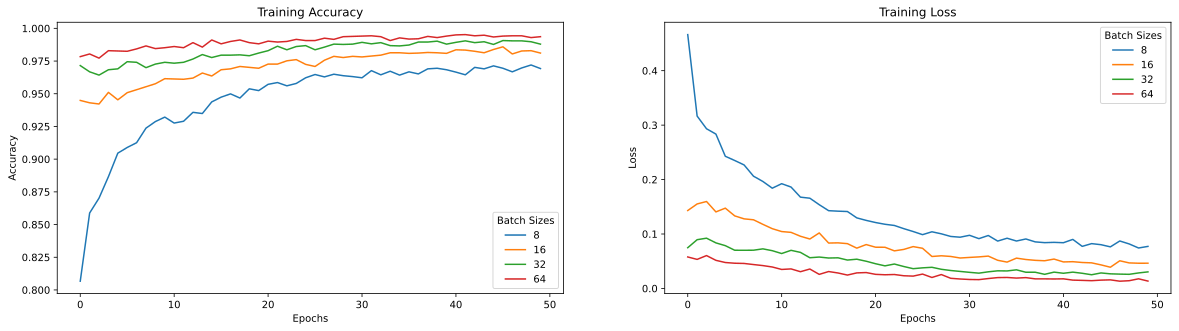

In [61]:
epochs = [i for i in range(n_epoch)]
fig , ax = plt.subplots(1,2, facecolor='white')
fig.set_size_inches(20,5)

ax[0].set_title('Training Accuracy')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].set_title('Training Loss')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

for idx, batch_size in enumerate(batch_sizes):
    hist = np.load(f'batchsz_{batch_size}.npy', allow_pickle='true').item()
    ax[0].plot(epochs , hist['accuracy'] , f'C{idx}', label = batch_size)
    ax[1].plot(epochs , hist['loss'] , f'C{idx}', label = batch_size)

ax[0].legend(title="Batch Sizes")
ax[1].legend(title="Batch Sizes")

plt.savefig('batch sizes')

plt.show()

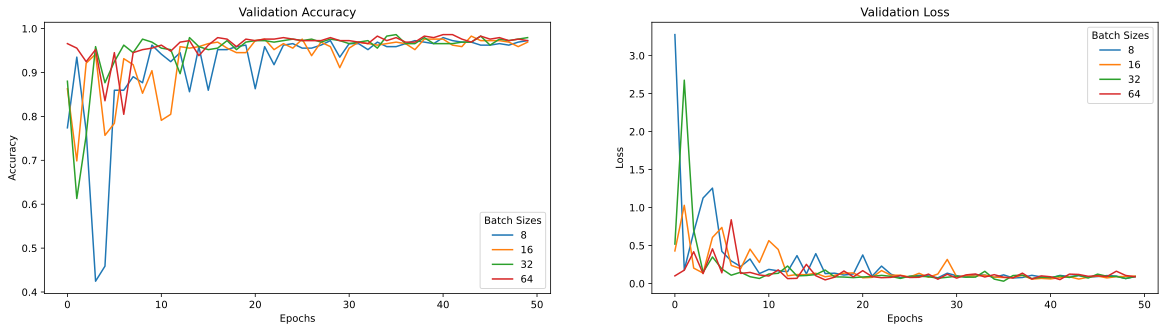

In [62]:
epochs = [i for i in range(n_epoch)]
fig , ax = plt.subplots(1,2, facecolor='white')
fig.set_size_inches(20,5)

ax[0].set_title('Validation Accuracy')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].set_title('Validation Loss')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

for idx, batch_size in enumerate(batch_sizes):
    hist = np.load(f'batchsz_{batch_size}.npy', allow_pickle='true').item()
    ax[0].plot(epochs , hist['val_accuracy'] , f'C{idx}', label = batch_size)
    ax[1].plot(epochs , hist['val_loss'] , f'C{idx}', label = batch_size)

ax[0].legend(title="Batch Sizes")
ax[1].legend(title="Batch Sizes")

plt.savefig('batch sizes')

plt.show()

In [66]:
! cp   /content/*.png      /content/drive/MyDrive/data/